In [1]:
import torch
from PIL import Image
import numpy as np
import pandas as pd
import torch
import os
import sys
from torch.utils import data
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.manifold import TSNE


sys.path.append('../')

from utils import utils, model_fetch, dataloader
metrics_dict = {}

np.random.seed(0)

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [40]:
# Loading both test sets - CIFAR and CIFAR - 10H -- Images are same.

_CLASSES = ['plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# interest_classes = [i for i in range(10)]
interest_classes = [4,7,8]
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict



In [41]:
def find_reps(model, perplexity=5, interest_classes=interest_classes, segregate=True, thresholded=False, thresh_count=float("inf")):
    if 'training' in model:
        file_path = '../data/data-cifar-10/cifar-10-batches-py/data_batch_1'
    else:
        file_path = '../data/data-cifar-10/cifar-10-batches-py/test_batch'

    label_dict = unpickle(file_path)

    # Labels for the data
    labels = label_dict[b'labels'] 
    label_names = [_CLASSES[i] for i in labels]
    
    
    features_path = '../../results/embeddings/'+ model +'.npy'
    features = np.load(features_path)
    
    if thresholded:
        thresh_count = 200
        

    if segregate:
        # Currently Cat, Deer, Ship
        class_counts = {item:0 for item in interest_classes}

        seg_feats = []
        seg_labels = []
        for i in range(len(features)):
            if labels[i] in interest_classes and class_counts[labels[i]] <= thresh_count:
                seg_feats.append(features[i])
                seg_labels.append(labels[i])
                class_counts[labels[i]] += 1

        seg_labels = [_CLASSES[i] for i in seg_labels]

        seg_feats = np.array(seg_feats)
        seg_labels = np.array(seg_labels)

        features = seg_feats
        label_names = seg_labels
        
        
    tsne = TSNE(perplexity=perplexity, init='pca')
    reduced = tsne.fit_transform(features)
#     reduced_transformed = reduced
    reduced_transformed = reduced - np.min(reduced, axis=0)
    reduced_transformed /= np.max(reduced_transformed, axis=0)


    dat = pd.DataFrame(reduced_transformed, columns=["x", "y"])
    dat["labels"] = label_names

    return dat

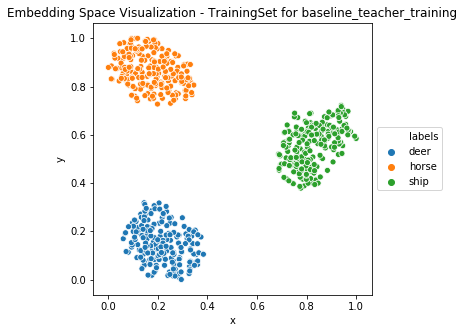

In [47]:
model = 'baseline_teacher_training'
figsize_fig = (5,5)
dat =  find_reps(model, perplexity=20, segregate=True, thresholded=True, thresh_count=float("inf"))

plt.figure(figsize=figsize_fig)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="x", y="y",
                     hue="labels",
                     data=dat,
               )
# plt.grid(True)
plt.title("Embedding Space Visualization - TrainingSet for {}".format(model))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

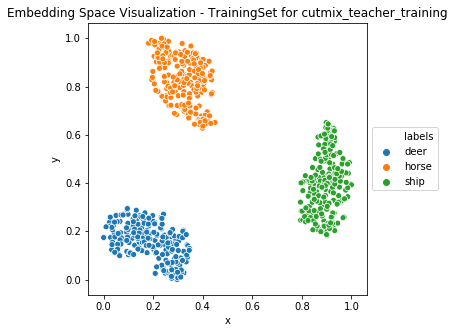

In [43]:
model = 'cutmix_teacher_training'

dat =  find_reps(model, perplexity=20, segregate=True, thresholded=True, thresh_count=float("inf"))

plt.figure(figsize=figsize_fig)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="x", y="y",
                     hue="labels",
                     data=dat,
               )
# plt.grid(True)
plt.title("Embedding Space Visualization - TrainingSet for {}".format(model))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

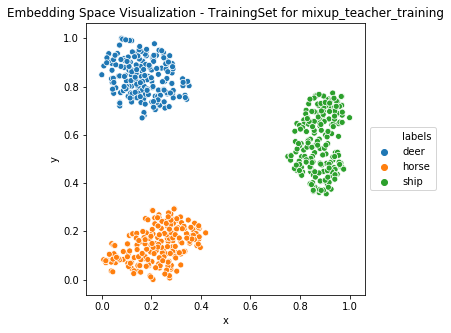

In [44]:
model = 'mixup_teacher_training'

dat =  find_reps(model, perplexity=20, segregate=True, thresholded=True, thresh_count=float("inf"))

plt.figure(figsize=figsize_fig)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="x", y="y",
                     hue="labels",
                     data=dat,
               )
# plt.grid(True)
plt.title("Embedding Space Visualization - TrainingSet for {}".format(model))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

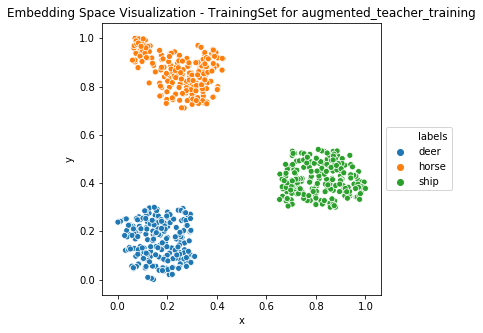

In [45]:
model = 'augmented_teacher_training'

dat =  find_reps(model, perplexity=20, segregate=True, thresholded=True, thresh_count=float("inf"))

plt.figure(figsize=figsize_fig)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="x", y="y",
                     hue="labels",
                     data=dat,
               )
# plt.grid(True)
plt.title("Embedding Space Visualization - TrainingSet for {}".format(model))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

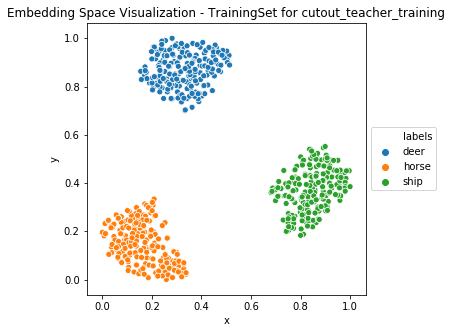

In [46]:
model = 'cutout_teacher_training'

dat =  find_reps(model, perplexity=20, segregate=True, thresholded=True, thresh_count=float("inf"))

plt.figure(figsize=figsize_fig)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="x", y="y",
                     hue="labels",
                     data=dat,
               )
# plt.grid(True)
plt.title("Embedding Space Visualization - TrainingSet for {}".format(model))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))